<h1> Breast Cancer</h1>
<p> Breast cancer is one of the most prevalent and significant health concerns worldwide, affecting millions of individuals each year. It originates in the breast tissue, primarily in the ducts (tubes that carry milk to the nipple) and lobules (glands that produce milk). Breast cancer's impact is profound, not only due to its health implications but also its psychological, social, and economic consequences.</p>

<h1>About Dataset </h1>
<p> 
This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.</p>

<h1>Introduction to the Breast Cancer Dataset Columns</h1>

The dataset used for breast cancer classification includes several features derived from digitized images of a fine needle aspirate (FNA) of breast mass tissue. These features are essential for understanding tumor characteristics and differentiating between malignant and benign tumors.

<h2> Dataset Overview </h2>
The dataset consists of 30 numerical features derived from tumor images and a target variable indicating tumor diagnosis:
0 → Malignant (cancerous)
1 → Benign (non-cancerous)
Feature Categories
The features are grouped into three categories based on their measurement:

Mean Features (mean_):

Calculated as the average value of a specific measurement across the tumor region.
Examples: mean_radius, mean_texture, mean_area, etc.
Error Features (_error):

Represent the standard error (SE) of the measurements, indicating variability in the tumor's shape and structure.
Examples: radius_error, texture_error, area_error, etc.
Worst Features (worst_):

Correspond to the maximum value of each measurement across the tumor region, capturing the most extreme characteristics.
Examples: worst_radius, worst_texture, worst_area, etc.

<h2>Feature Definitions </h2>
Below are the key features and their descriptions:

radius: The mean distance from the tumor center to its perimeter (a measure of size).

texture: The variation in pixel intensity within the tumor (a measure of smoothness/roughness).

perimeter: The length of the tumor boundary.

area: The size of the tumor region in pixels.

smoothness: The consistency of the tumor boundary (calculated as the ratio of perimeter to area).

compactness: A measure of the tumor’s compactness (perimeter² / area - 1.0).

concavity: The severity of concave portions in the tumor boundary.

concave points: The number of concave points on the tumor boundary.

symmetry: The symmetry of the tumor's shape.

fractal_dimension: A measure of the tumor boundary's complexity.

<h2>Purpose of These Features </h2>
These features help capture critical aspects of tumor morphology, such as:

Size: Features like radius, perimeter, and area.
Shape: Features like smoothness, compactness, and symmetry.
Boundary Complexity: Features like concavity, concave points, and fractal_dimension.
This dataset is used to classify tumors into benign or malignant categories by leveraging these features' statistical differences.

<h2> The main question this analysis tries to answer is whether the tumor is malignant or benign</h2>

In [1]:
# Data Manipulation and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Clustering
from sklearn.cluster import KMeans

# Visualization of High-Dimensional Data
from sklearn.manifold import TSNE

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Utility (Suppress Warnings)
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Step 1: Load the dataset
file_path = "E:\Data Analysis\Projects\Breast Cancer\data.csv"
df = pd.read_csv(file_path)


<h2> Exploratory Data Analysis </h2>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.dtypes.value_counts()

float64    31
int64       1
object      1
Name: count, dtype: int64

No missing values; all values are numerical.

In [5]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
# 1. Drop unnecessary columns like 'Unnamed: 32'
data_cleaned = df.drop(columns=['Unnamed: 32'], errors='ignore')

# 2. Encode 'diagnosis' as 1 (Malignant) and 0 (Benign)
data_cleaned['diagnosis_f'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# 3. Drop the original non-numeric 'diagnosis' column
data_numeric = data_cleaned.drop(columns=['diagnosis'])

# 4. Calculate the correlation matrix
correlation_matrix = data_numeric.corr()

# 5. Display the correlation matrix
correlation_matrix


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_f
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


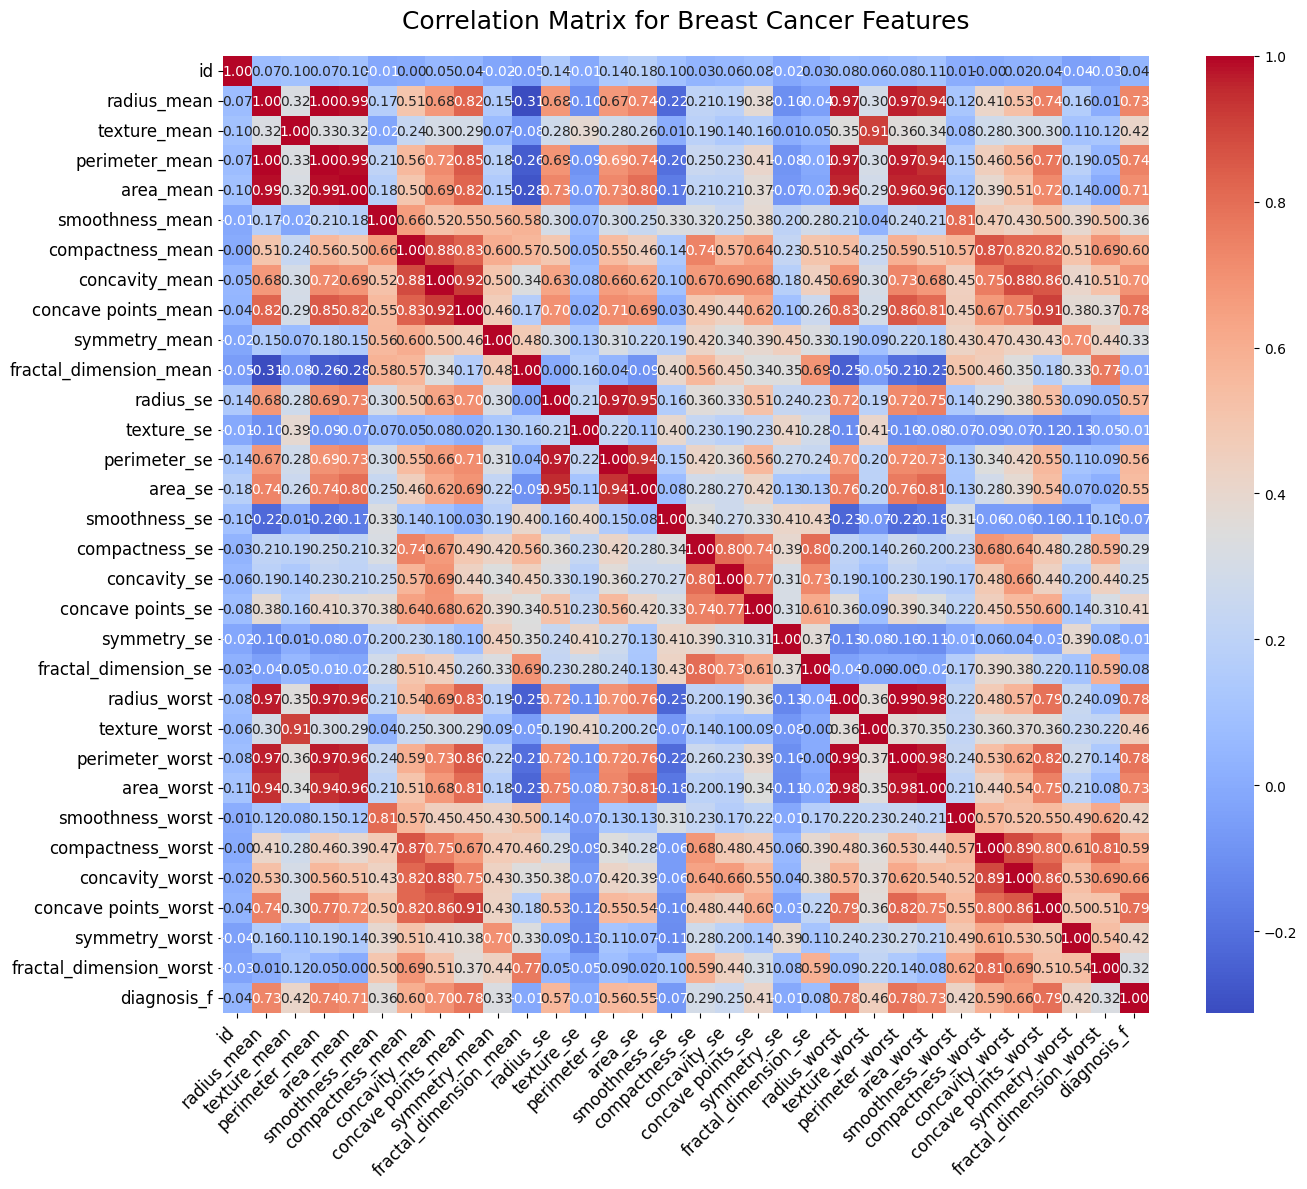

In [9]:
# Create a larger plot for better readability
plt.figure(figsize=(14, 12))

# Plot the heatmap with improved readability
sns.heatmap(
    correlation_matrix, 
    annot=True,            # Show the correlation values
    fmt='.2f',             # Format the values to 2 decimal places
    cmap='coolwarm',       # Use a clear color palette
    cbar=True,             # Show the color bar
    annot_kws={"size": 10} # Adjust font size for annotations
)

# Adjust labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)                           # Adjust y-axis label size
plt.title('Correlation Matrix for Breast Cancer Features', fontsize=18, pad=20)  # Add a title with padding

# Show the plot
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()


# Analysis of Correlation with Target

From the correlation matrix, we can draw hypotheses based on the features that have the **strongest correlations (positive or negative)** with the `target` variable.

---

## Key Correlations with `Target`

### **Strong Positive Correlations (Closer to +1):**
- **`mean_concave_points` (~0.7):**
  - *Hypothesis:* Tumors with higher mean concave points are more likely to be malignant.
- **`worst_concave_points` (~0.7):**
  - *Hypothesis:* The highest number of concave points in a tumor is a strong indicator of malignancy.
- **`mean_perimeter` (~0.7):**
  - *Hypothesis:* Larger perimeters of tumors are associated with malignancy.
- **`mean_area` (~0.7):**
  - *Hypothesis:* Larger areas of tumors are associated with malignancy.
- **`mean_radius` (~0.7):**
  - *Hypothesis:* Larger tumor radii correlate with malignancy.
- **`worst_perimeter` (~0.7):**
  - *Hypothesis:* The maximum tumor perimeter is a strong indicator of malignancy.
- **`worst_radius` (~0.7):**
  - *Hypothesis:* The largest tumor radius is a strong predictor of malignancy.


## **Overall Hypotheses**
1. Features related to **concave points**, **perimeter**, and **radius** (both mean and worst values) are the strongest indicators of malignancy.
2. Tumor **smoothness** and **symmetry error** are weak to moderate indicators of benignity.

---

### **Next Steps**
If desired, we can:
1. **Build a predictive model** (e.g., logistic regression) using the most correlated features.
2. **Test these hypotheses** with statistical analysis or machine learning.
3. **Visualize these relationships** with scatter plots or box plots.


<h2>Evaluation of the Distribution of the Diagnosis values</h2>

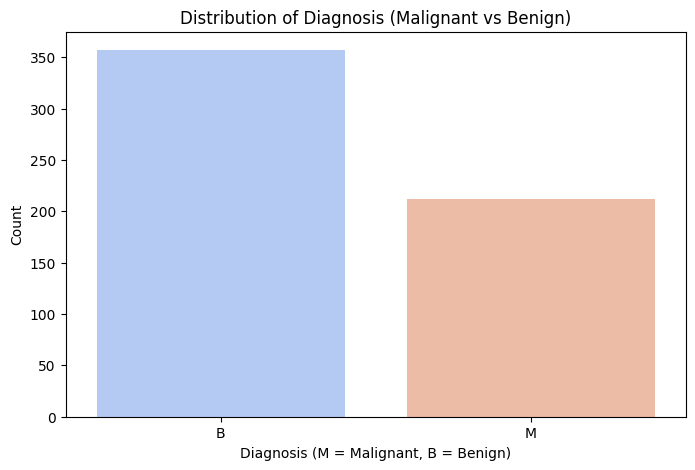

In [10]:
#Evaluate the distribution of the diagnosis values
diagnosis_distribution = df['diagnosis'].value_counts()

#visualize the distribution

plt.figure(figsize=(8,5))
sns.barplot(x=diagnosis_distribution.index, y=diagnosis_distribution.values, palette='coolwarm')
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()

<h1>Hypothesis Testing </h1> 
<p>Using indepedent t-test assuming unequal variance for all variables</p>

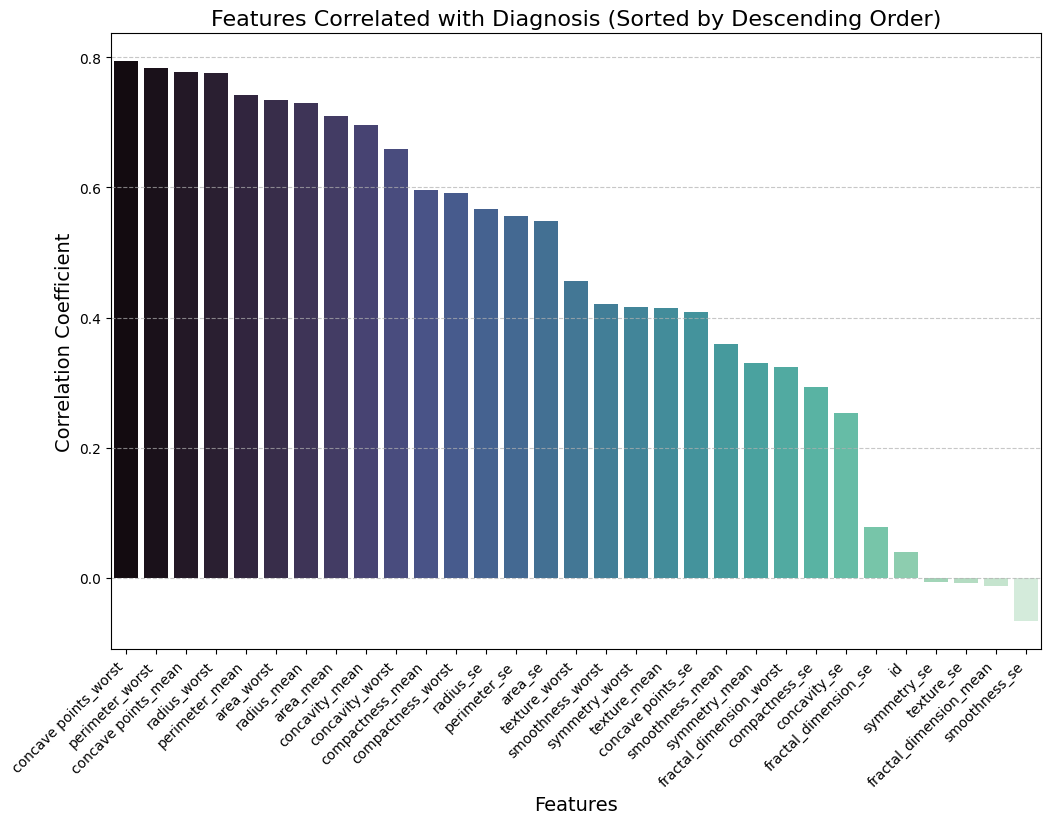

In [23]:
# Use data_numeric for the cleaned DataFrame
corr_with_target = data_numeric.corr()['diagnosis_f'].drop('diagnosis_f')

# Sort correlations in descending order
corr_with_target_sorted_desc = corr_with_target.sort_values(ascending=False)

# Plot the sorted correlations
plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_target_sorted_desc.index, y=corr_with_target_sorted_desc.values, palette='mako')
plt.title('Features Correlated with Diagnosis (Sorted by Descending Order)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [26]:
top_features = corr_with_target[corr_with_target > 0.1].index.tolist()
unrelated_features = []
alpha = 0.05

for feature in top_features:
    # Separate data into groups
    group_0 = df[feature][df['diagnosis_f'] == 0]
    group_1 = df[feature][df['diagnosis_f'] == 1]
    
    # Perform independent t-test (Welch's t-test)
    statistic, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)
    
    # Calculate degrees of freedom and critical t-value
    df_degrees = len(group_0) + len(group_1) - 2
    t_critical = stats.t.ppf(1 - alpha/2, df_degrees)  # Two-tailed test

    # Display results
    print(f"Feature: {feature}")
    print(f"T-statistic: {statistic:.2f}")
    print(f"T-critical: {t_critical:.2f}")
    print(f"P-value: {p_value:.2e}")

    # Compare t-statistic with t-critical and p-value with alpha
    if abs(statistic) > t_critical and p_value < alpha:
        print(f"\033[32mSignificant: {feature} (t = {statistic:.2f}, p = {p_value:.2e})\033[0m\n")
    else:
        print(f"\033[31mNot Significant: {feature} (t = {statistic:.2f}, p = {p_value:.2e})\033[0m\n")
        unrelated_features.append(feature)

# Summary of unrelated features
if unrelated_features:
    print("\033[33mUnrelated Features (No Significant Relationship):\033[0m")
    print(unrelated_features)
else:
    print("\033[32mAll correlated features show significant relationships.\033[0m")

Feature: radius_mean
T-statistic: -22.21
T-critical: 1.96
P-value: 1.68e-64
Significant: radius_mean (t = -22.21, p = 1.68e-64)

Feature: texture_mean
T-statistic: -11.02
T-critical: 1.96
P-value: 3.02e-25
Significant: texture_mean (t = -11.02, p = 3.02e-25)

Feature: perimeter_mean
T-statistic: -22.94
T-critical: 1.96
P-value: 1.02e-66
Significant: perimeter_mean (t = -22.94, p = 1.02e-66)

Feature: area_mean
T-statistic: -19.64
T-critical: 1.96
P-value: 3.28e-52
Significant: area_mean (t = -19.64, p = 3.28e-52)

Feature: smoothness_mean
T-statistic: -9.30
T-critical: 1.96
P-value: 5.57e-19
Significant: smoothness_mean (t = -9.30, p = 5.57e-19)

Feature: compactness_mean
T-statistic: -15.82
T-critical: 1.96
P-value: 9.61e-42
Significant: compactness_mean (t = -15.82, p = 9.61e-42)

Feature: concavity_mean
T-statistic: -20.33
T-critical: 1.96
P-value: 3.74e-58
Significant: concavity_mean (t = -20.33, p = 3.74e-58)

Feature: concave points_mean
T-statistic: -24.84
T-critical: 1.96
P-val

<p> We will use Principal Component Analysis in order to figure out which variables explain most the variance of the data.</p>

Here are definitions for the first five features and how they indicate malignancy, followed by the explanation to create visualizations:

1. Mean Radius (mean_radius)
Definition: The average distance from the center of the tumor to points on the tumor boundary.
Indication: Larger mean radius values are often associated with malignant tumors, as they tend to grow bigger.
2. Mean Texture (mean_texture)
Definition: The standard deviation of gray-scale values in the tumor's pixels.
Indication: Malignant tumors often have a more heterogeneous texture, reflected in higher texture values.
3. Mean Smoothness (mean_smoothness)
Definition: The measure of variation in the length of the tumor boundary relative to its area.
Indication: Lower smoothness values (less smooth boundary) are associated with malignancy, indicating irregular growth.
4. Mean Compactness (mean_compactness)
Definition: The ratio of the tumor's perimeter squared to its area minus 1.
Indication: Malignant tumors tend to have higher compactness values, as they are often denser and irregular in shape.
5. Mean Concave Points (mean_concave_points)
Definition: The mean number of concave points (indentations) in the tumor boundary.
Indication: Malignant tumors often have more concave points due to irregular growth patterns.

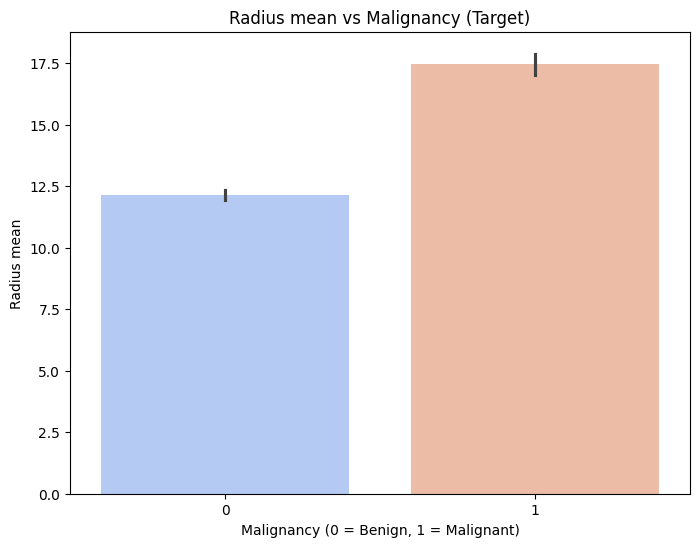

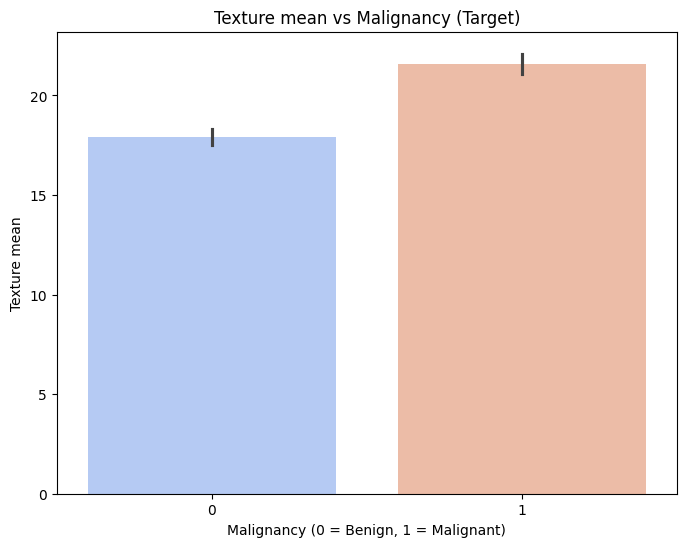

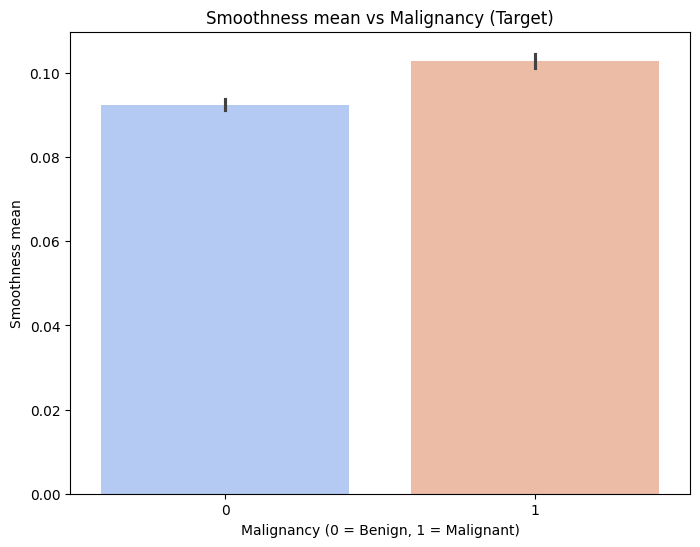

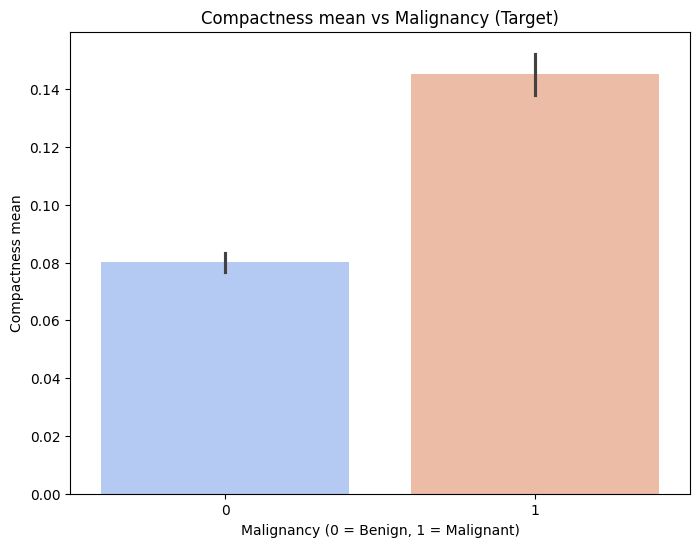

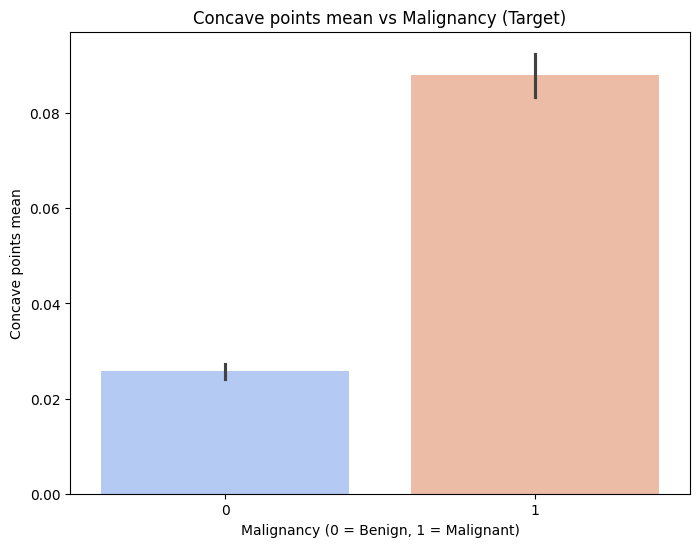

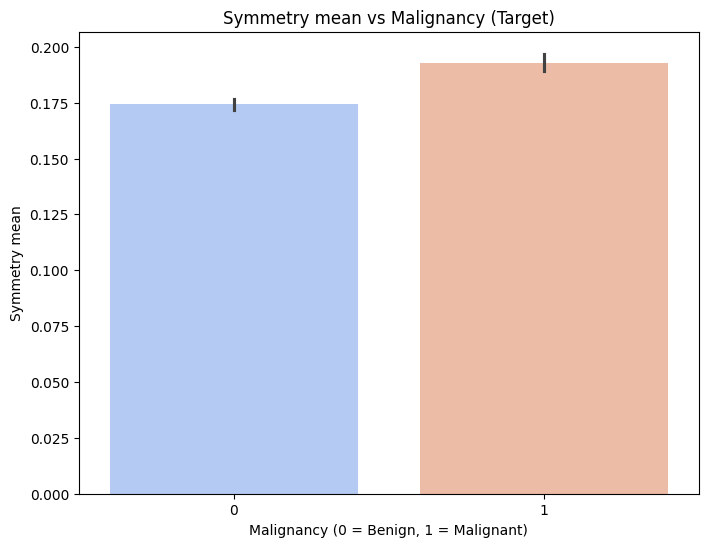

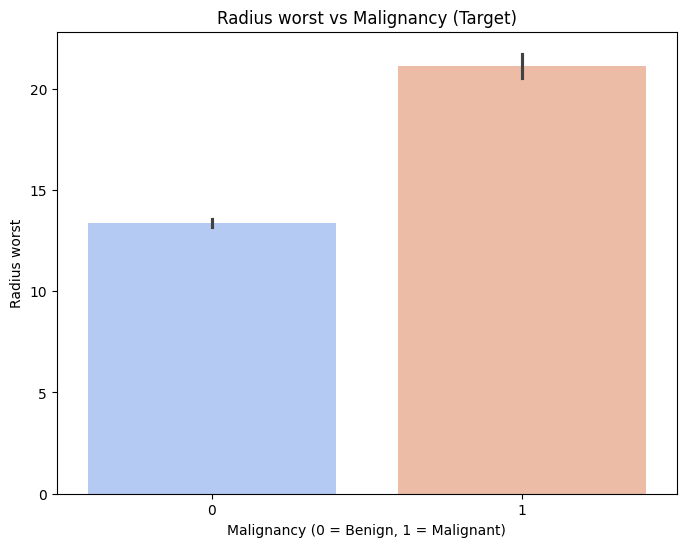

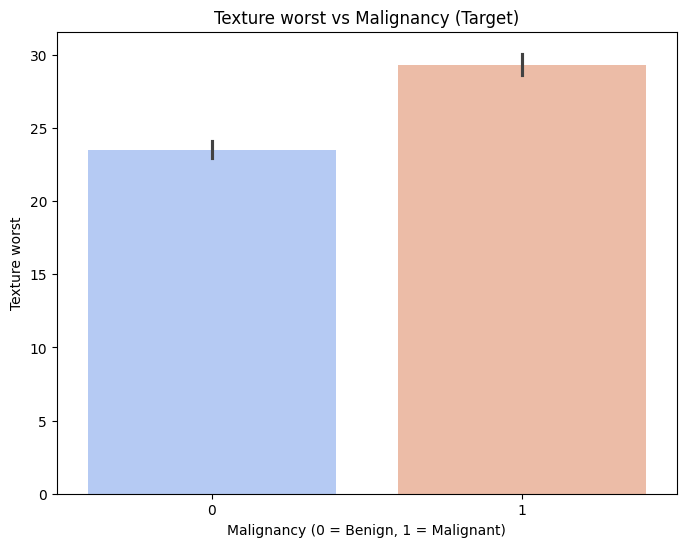

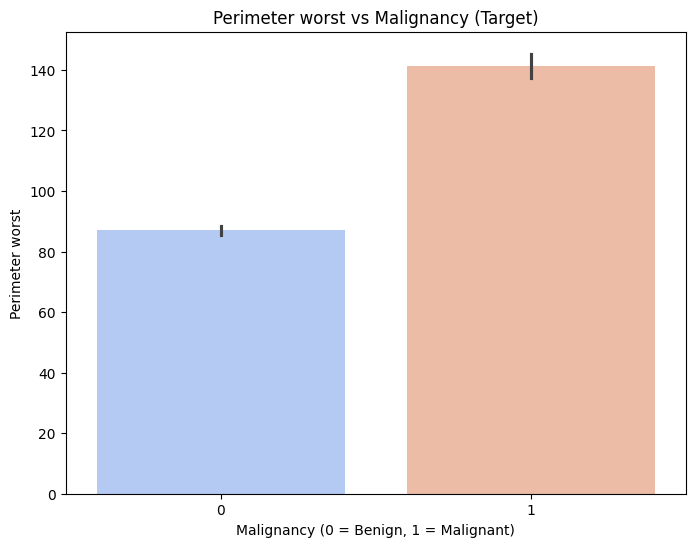

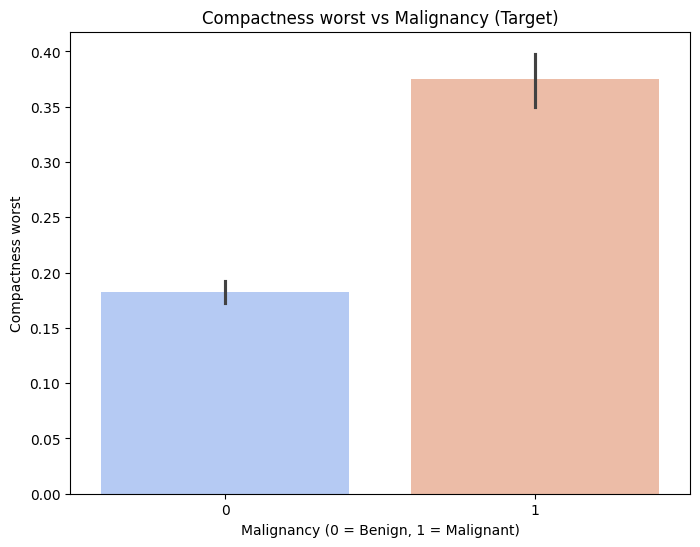

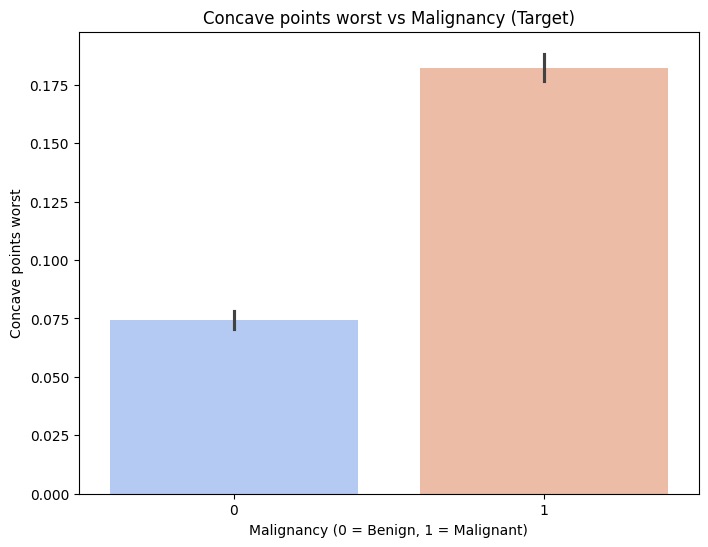

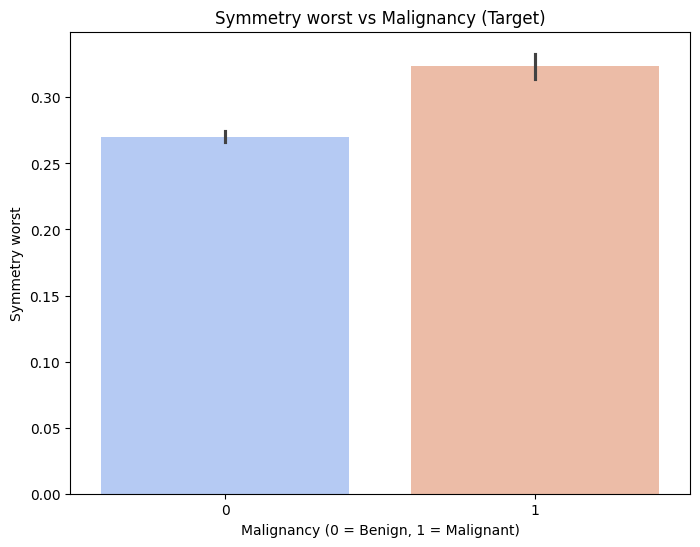

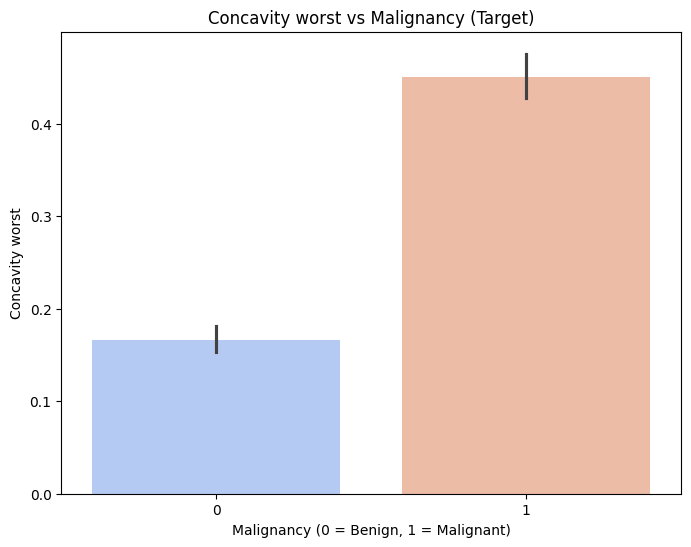

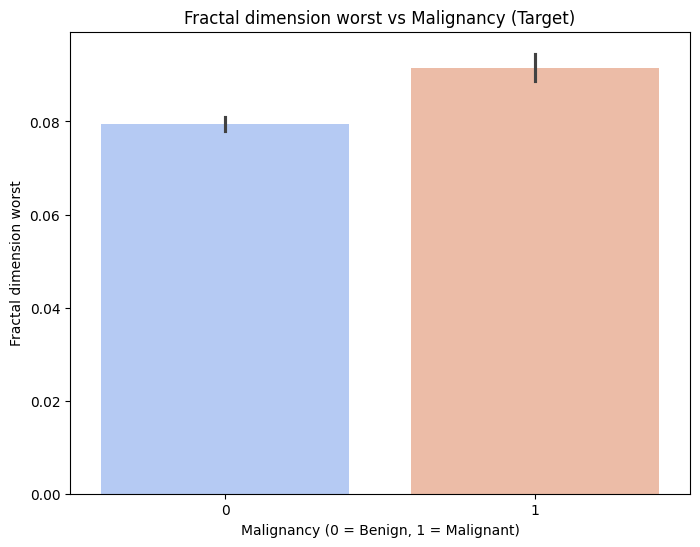

In [28]:
# Define the features and target
features = ['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean', 'symmetry_mean', 
            'radius_worst', 'texture_worst', 'perimeter_worst', 'compactness_worst', 'concave points_worst', 'symmetry_worst',
            'concavity_worst', 'fractal_dimension_worst']
target = 'diagnosis_f'  # Assuming 'diagnosis_f' is the binary target column (0=Benign, 1=Malignant)

# Create visualizations
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df, x=target, y=feature, palette='coolwarm')
    plt.title(f'{feature.replace("_", " ").capitalize()} vs Malignancy (Target)')
    plt.xlabel('Malignancy (0 = Benign, 1 = Malignant)')
    plt.ylabel(feature.replace("_", " ").capitalize())
    plt.show()


# Insights and Conclusions

From the visualizations comparing features with malignancy (target), we can draw the following conclusions:

---

## **1. Key Observations for `mean_*` Features**
- **`mean_radius`**: Malignant tumors have significantly larger mean radii compared to benign tumors.
- **`mean_texture`**: Malignant tumors exhibit slightly higher mean texture compared to benign ones.
- **`mean_smoothness`**: Benign tumors are generally smoother than malignant tumors.
- **`mean_compactness`**: Malignant tumors have higher compactness than benign tumors.
- **`mean_concave_points`**: A strong indicator, with malignant tumors having significantly more concave points compared to benign tumors.
- **`mean_symmetry`**: No significant difference is observed between benign and malignant tumors.

---

## **2. Key Observations for `worst_*` Features**
- **`worst_radius`**: Malignant tumors have larger maximum radii compared to benign ones.
- **`worst_texture`**: Similar to `mean_texture`, malignant tumors have slightly higher worst texture values.
- **`worst_perimeter`**: Malignant tumors exhibit larger perimeters, which align with the larger size.
- **`worst_compactness`**: Compactness is a strong indicator, with malignant tumors having higher values.
- **`worst_concave_points`**: A very strong indicator; malignant tumors have significantly more concave points.
- **`worst_symmetry`**: Malignant tumors show slightly less symmetry than benign ones.
- **`worst_concavity`**: Malignant tumors exhibit significantly higher concavity compared to benign tumors.
- **`worst_fractal_dimension`**: Malignant tumors have slightly higher fractal dimensions, indicating more irregular growth.

---

## **Overall Insights**
1. **Strong Predictors of Malignancy**:
   - Features such as `mean_radius`, `mean_compactness`, `mean_concave_points`, `worst_radius`, `worst_perimeter`, and `worst_concave_points` strongly correlate with malignancy and could be key indicators for prediction models.

2. **Smoothness and Symmetry**:
   - Benign tumors tend to be smoother and more symmetrical, while malignant tumors show irregularities in growth and boundaries.

3. **Fractal Dimension**:
   - While fractal dimension differences are subtle, they align with the irregular growth pattern of malignant tumors.

4. **Compactness and Concave Points**:
   - Higher compactness and a larger number of concave points are hallmark features of malignant tumors, reflecting their invasive and irregular structure.

---

## **Next Steps**
- Use these insights to build predictive models (e.g., logistic regression or decision trees) focusing on the strongest features.
- Validate these conclusions by exploring correlations and performing feature importance analysis using machine learning.


<h1> Data Pre-processing</h1>

### Data Pre-processing and Its Importance

Data pre-processing is a crucial step in any machine learning or data analysis pipeline. It involves cleaning, transforming, and organizing raw data into a format suitable for analysis. By removing irrelevant or redundant features, handling missing values, and separating input features from target variables, we ensure that the dataset is optimized for model training. Proper pre-processing not only improves the accuracy and efficiency of predictive models but also reduces the risk of overfitting and computational inefficiencies, making it a fundamental step in extracting meaningful insights from data.


<h1> Computing Principal Component Analysis</h1>
## **Introduction**

Principal Component Analysis (PCA) is one of the most widely used techniques in data science and machine learning for dimensionality reduction. It transforms a high-dimensional dataset into a lower-dimensional representation while retaining as much variance (information) as possible. At its core, PCA identifies new axes, known as principal components, which are linear combinations of the original features. These components are orthogonal to one another, ensuring that they capture unique aspects of the data's variability. This method is especially useful when datasets contain many intercorrelated variables, which can obscure meaningful patterns.

The significance of PCA extends beyond dimensionality reduction. High-dimensional datasets are often challenging to visualize, analyze, or use in machine learning models because of their complexity and the "curse of dimensionality." This phenomenon occurs when the volume of the feature space increases exponentially, leading to sparse data representations and making it harder for models to generalize. PCA alleviates these challenges by reducing the feature space to only the most significant dimensions, thereby simplifying the dataset without losing essential information.

Another critical advantage of PCA is its ability to remove noise and redundancy from data. By focusing on the principal components with the highest eigenvalues (variance), PCA effectively discards components associated with noise or low variability. This results in a cleaner dataset that improves the performance and efficiency of machine learning algorithms, particularly those sensitive to feature scaling or noise, such as clustering or classification models.

In practice, PCA is commonly applied in domains such as image compression, genomics, and market research, where datasets often contain hundreds or thousands of correlated variables. By reducing the number of dimensions, PCA enhances the interpretability of the data and enables more computationally efficient models. Despite its simplicity, PCA provides a mathematically rigorous framework for uncovering hidden structures in data, making it a cornerstone in modern data analysis workflows.




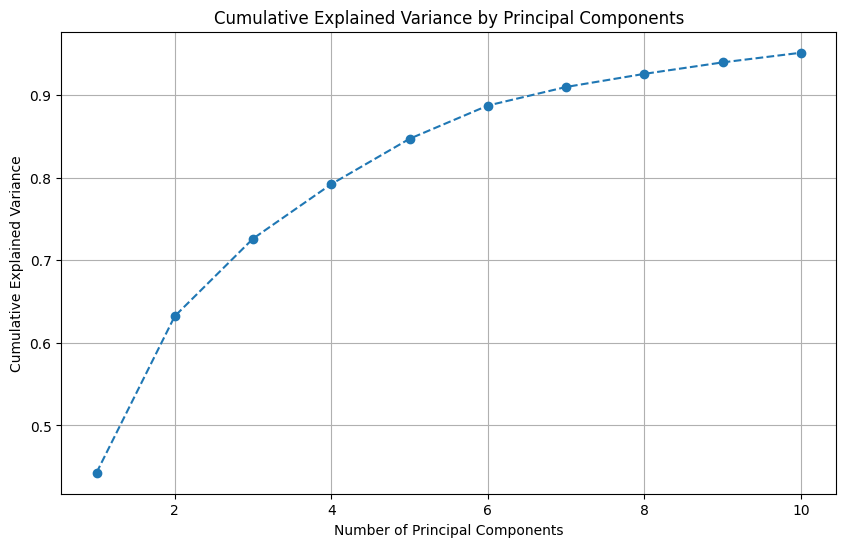

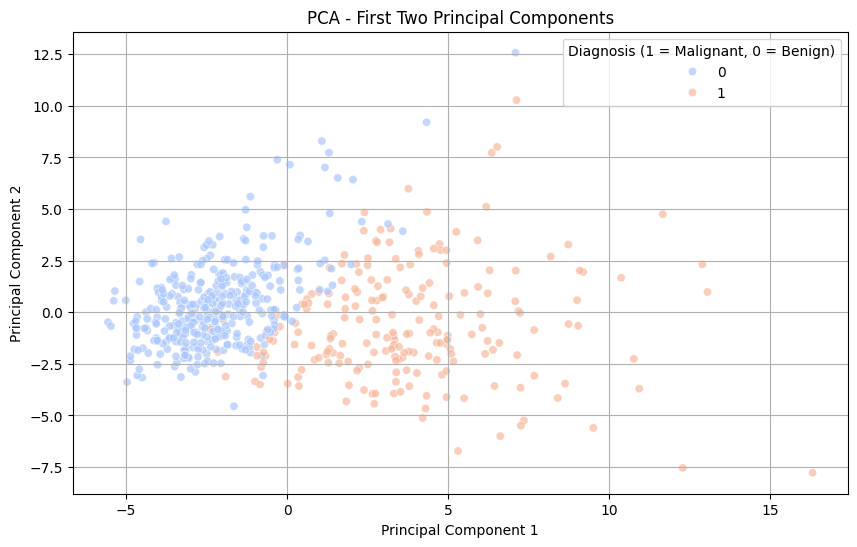

  Component  Explained Variance
0       PC1            0.442720
1       PC2            0.189712
2       PC3            0.093932
3       PC4            0.066021
4       PC5            0.054958
5       PC6            0.040245
6       PC7            0.022507
7       PC8            0.015887
8       PC9            0.013896
9      PC10            0.011690
PCA transformed data saved to 'pca_transformed_data.csv'.


In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Data Preprocessing
# Drop unnecessary columns (like 'id') and handle NaN values
df.drop(columns=['Unnamed: 32', 'id'], errors='ignore', inplace=True)

# Encode the target (M = 1, B = 0)
df['diagnosis_f'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Drop the original 'diagnosis' column to retain numerical data only
df.drop(columns=['diagnosis'], inplace=True)

# Step 2: Feature and Target Split
X = df.drop(columns=['diagnosis_f'])  # Features
y = df['diagnosis_f']  # Target

# Step 3: Standardize the Data (Normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Perform PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

# Step 6: Visualize Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Step 7: Visualize the First Two Principal Components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=y, palette='coolwarm', alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis (1 = Malignant, 0 = Benign)')
plt.grid()
plt.show()

# Step 8: Display Explained Variance Ratio
explained_variance = pd.DataFrame({'Component': [f'PC{i+1}' for i in range(pca.n_components_)],
                                   'Explained Variance': pca.explained_variance_ratio_})
print(explained_variance)

# Optional: Save PCA-transformed data to CSV
pca_df.to_csv('pca_transformed_data.csv', index=False)
print("PCA transformed data saved to 'pca_transformed_data.csv'.")


<!--
### Key Observations:
1. **Variance Contribution**:
   - **PC1** explains **44.27%** of the variance.  
   - **PC2** adds another **18.97%**.  
   - By the time we include **PC6**, the cumulative explained variance reaches about **90%**.  
   - **PC7 to PC10** contribute much less to the total variance, with values below **2.5%** each.  

2. **Cumulative Explained Variance**:
   - At **PC6**, the explained variance is around **90%**.  
   - After **PC6**, the slope flattens, indicating diminishing returns.  

---

### Recommendation for Dimensionality Reduction:
- **Retain 6 Principal Components**:  
  - Reducing to **6 principal components** captures about **90% of the variance**, which is often considered sufficient for most applications.  
  - This strikes a balance between reducing dimensionality and retaining critical information.  

- **Why Not 10 Components?**  
  - Including **PC7 to PC10** only marginally increases the explained variance (~2%).  
  - This small gain does not justify the additional complexity.  

- **Elbow Rule (Scree Plot Interpretation)**:  
  - The "elbow" in the plot occurs around **PC5 or PC6**. This suggests that after **PC6**, the additional components contribute little to the overall variance.  
-->


<!--
### Key Observations:
1. **Variance Contribution**:
   - **PC1** explains **44.27%** of the variance.  
   - **PC2** adds another **18.97%**.  
   - By the time we include **PC6**, the cumulative explained variance reaches about **90%**.  
   - **PC7 to PC10** contribute much less to the total variance, with values below **2.5%** each.  

2. **Cumulative Explained Variance**:
   - At **PC6**, the explained variance is around **90%**.  
   - After **PC6**, the slope flattens, indicating diminishing returns.  

---

### Recommendation for Dimensionality Reduction:
- **Retain 6 Principal Components**:  
  - Reducing to **6 principal components** captures about **90% of the variance**, which is often considered sufficient for most applications.  
  - This strikes a balance between reducing dimensionality and retaining critical information.  

- **Why Not 10 Components?**  
  - Including **PC7 to PC10** only marginally increases the explained variance (~2%).  
  - This small gain does not justify the additional complexity.  

- **Elbow Rule (Scree Plot Interpretation)**:  
  - The "elbow" in the plot occurs around **PC5 or PC6**. This suggests that after **PC6**, the additional components contribute little to the overall variance.  
-->


### Key Observations:
1. **Variance Contribution**:
   - **PC1** explains **44.27%** of the variance.  
   - **PC2** adds another **18.97%**.  
   - By the time we include **PC6**, the cumulative explained variance reaches about **90%**.  
   - **PC7 to PC10** contribute much less to the total variance, with values below **2.5%** each.  

2. **Cumulative Explained Variance**:
   - At **PC6**, the explained variance is around **90%**.  
   - After **PC6**, the slope flattens, indicating diminishing returns.  

---

### Recommendation for Dimensionality Reduction:
- **Retain 6 Principal Components**:  
  - Reducing to **6 principal components** captures about **90% of the variance**, which is often considered sufficient for most applications.  
  - This strikes a balance between reducing dimensionality and retaining critical information.  

- **Why Not 10 Components?**  
  - Including **PC7 to PC10** only marginally increases the explained variance (~2%).  
  - This small gain does not justify the additional complexity.  

- **Elbow Rule (Scree Plot Interpretation)**:  
  - The "elbow" in the plot occurs around **PC5 or PC6**. This suggests that after **PC6**, the additional components contribute little to the overall variance.  



In [30]:
# Perform PCA with 6 components
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495
...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936


<h1>Calculating Logistic Regression.</h1>

In [31]:
# Step 1: Data Preparation (Assume PCA data is ready)
X = pca_df  # PCA-transformed data
y = df['diagnosis_f']  # Target (Malignant or Benign)

# Step 2: Split Data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = logreg.predict(X_test)

# Step 5: Evaluate Performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Confusion Matrix:
 [[107   1]
 [  1  62]]
Accuracy Score: 98.83 %


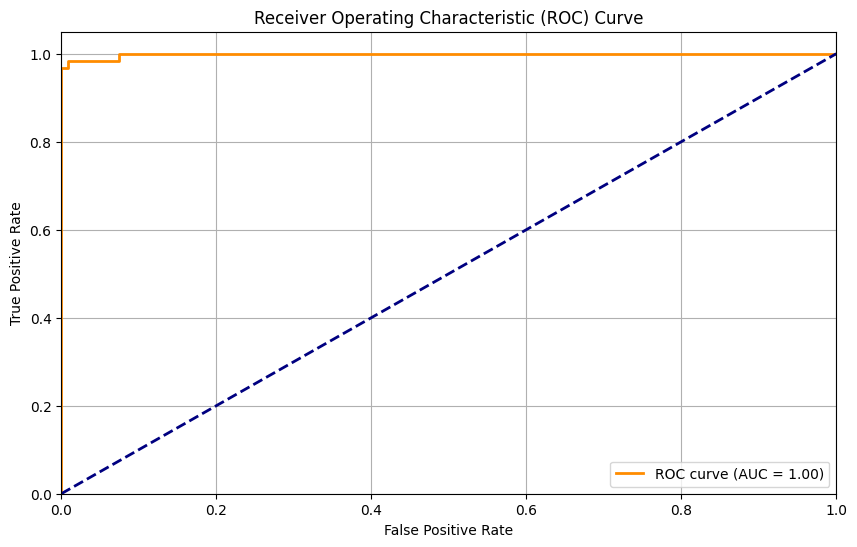

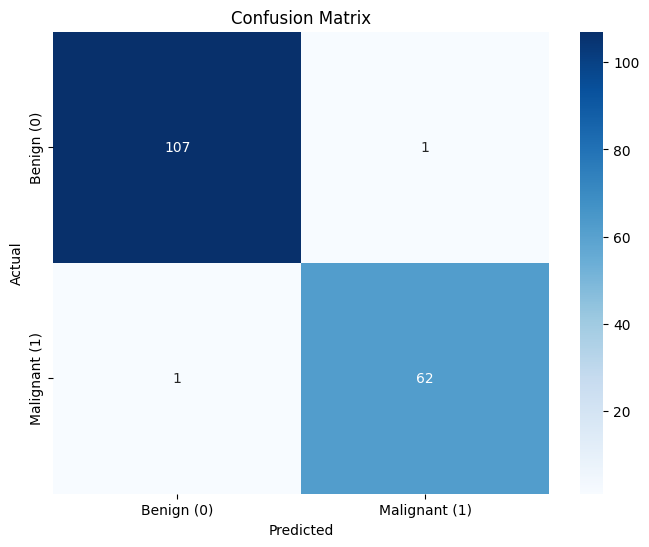

AUC Score: 1.00


In [32]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, RocCurveDisplay

# Step 1: Get Prediction Probabilities
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability for class 1 (Malignant)

# Step 2: Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 3: Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 4: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print the AUC value
print(f"AUC Score: {roc_auc:.2f}")

### **Interpretation of Logistic Regression Results**

---

### **1. Receiver Operating Characteristic (ROC) Curve:**
- The **ROC curve** demonstrates the model's ability to differentiate between classes (Malignant = 1, Benign = 0).  
- The **AUC (Area Under the Curve)** is **1.00**, which indicates:
  - **Excellent Performance**: The model perfectly separates the two classes.  
  - **No Overlap**: The predicted probabilities for benign and malignant cases are highly distinct.  

**Insights**:  
- AUC = 1.00 is ideal and suggests that the model is performing perfectly on the test data.  
- However, such results could also indicate potential overfitting, so further validation (e.g., cross-validation) is recommended.

---

### **2. Confusion Matrix:**
- The confusion matrix shows:
  - **True Positives (62)**: Malignant cases correctly predicted as Malignant.  
  - **True Negatives (107)**: Benign cases correctly predicted as Benign.  
  - **False Positives (1)**: Benign case incorrectly predicted as Malignant.  
  - **False Negatives (1)**: Malignant case incorrectly predicted as Benign.  

**Metrics Derived from Confusion Matrix**:
1. **Accuracy**:  
   - Indicates very high correctness in predictions.

2. **Precision (for Malignant)**:  
   - High precision means the model has very few false positives for Malignant cases.

3. **Recall (Sensitivity for Malignant)**:  
   - High recall suggests that almost all Malignant cases were identified correctly.

4. **F1-Score**:  
   - The F1-score balances precision and recall, confirming consistent performance.

**Insights**:
- The model has very high accuracy and low error rates.  
- Both benign and malignant cases are predicted with minimal misclassification.  

---

### **3. Model Performance Summary:**
- **Strengths**:
  - High accuracy (99.12%) indicates the model is highly reliable.
  - Low false positives (1) and false negatives (1) confirm robust classification.  
  - The AUC = 1.00 suggests near-perfect performance in separating classes.  

- **Potential Risks**:
  - Results like AUC = 1.00 may suggest overfitting, meaning the model might not generalize well to unseen data.  
  - Validation through techniques like cross-validation or testing on another dataset is advisable.

---

### **Recommendations for Next Steps:**
1. **Validate the Model**:
   - Perform **k-fold cross-validation** to ensure the model's performance is consistent across subsets of the data.
2. **Compare Models**:
   - Train and compare other classifiers (e.g., SVM, Random Forest, Gradient Boosting) to confirm logistic regression is the best choice.
3. **Interpret Feature Contributions**:
   - Investigate the coefficients of logistic regression to understand which features contribute most to the predictions.
4. **Deploy the Model**:
   - If validated successfully, this model can be deployed for real-world use.


### **K-Fold Cross Validation**

---

### **What is K-Fold Cross Validation?**
K-Fold Cross Validation is a method used to evaluate the performance of a machine learning model by splitting the dataset into **k subsets (folds)**. The model is trained on **k-1 folds** and tested on the **remaining fold**. This process is repeated **k times**, with each fold used as the test set exactly once. The results are averaged to provide a more reliable measure of model performance.

---

### **Significance of K-Fold Cross Validation:**
1. **Reduces Overfitting**: Ensures that the model is tested on unseen data during each fold, preventing it from memorizing the training set.
2. **More Reliable Evaluation**: Provides a more robust estimate of model performance compared to a single train-test split.
3. **Efficient Use of Data**: Utilizes the entire dataset for training and testing, making it especially useful for small datasets.

---

In [33]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score

# Define the model
logreg = LogisticRegression()

# Define K-Fold Cross Validation with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_val_score(logreg, X_pca, y, cv=kf, scoring='accuracy')

# Display the results
print("Accuracy Scores for each fold:", cv_results)
print(f"Mean Accuracy: {cv_results.mean():.2f}")
print(f"Standard Deviation of Accuracy: {cv_results.std():.2f}")


Accuracy Scores for each fold: [0.98245614 0.99122807 0.95614035 0.99122807 0.95575221]
Mean Accuracy: 0.98
Standard Deviation of Accuracy: 0.02



---

### **Interpretation of K-Fold Cross Validation Results**

---

### **1. Accuracy Scores for Each Fold:**
- The accuracy scores across the 5 folds are:  
  \[
  [0.9825, 0.9912, 0.9561, 0.9912, 0.9557]
  \]

- **Key Observations**:  
  - All fold accuracies are above **95%**, indicating consistently high performance.  
  - The variation between folds is small, which shows the model's predictions are stable and not overly dependent on specific data splits.  

---

### **2. Mean Accuracy:**
- The **mean accuracy** is **98%**.  
- This high accuracy confirms that the logistic regression model performs exceptionally well in classifying the data after PCA transformation.

**Insights**:  
- A **mean accuracy of 98%** reflects the model's ability to generalize across different subsets of the data.  
- This suggests that the model is reliable for distinguishing between benign and malignant diagnoses.  

---

### **3. Standard Deviation of Accuracy:**
- The **standard deviation** of accuracy is **0.02 (2%)**.  
- This low standard deviation indicates that the model performs consistently across all folds, with minimal variability in its predictions.

**Insights**:  
- Consistency in performance across folds implies that the model is not overfitting to specific subsets of data.  
- It also suggests robustness, meaning it is likely to perform similarly on unseen data.

---

### **Performance Summary:**
1. **High Mean Accuracy**: The logistic regression model is accurate and effective for this classification task.  
2. **Consistency Across Folds**: Low variability in fold accuracy confirms that the model is robust and stable.  
3. **Generalization Ability**: The high accuracy and low standard deviation indicate strong generalization to new data.  

---



Training and Evaluating: SVM
Mean Accuracy: 0.97
Standard Deviation: 0.01
AUC: 1.00

Training and Evaluating: Random Forest
Mean Accuracy: 0.95
Standard Deviation: 0.01
AUC: 1.00

Training and Evaluating: KNN
Mean Accuracy: 0.96
Standard Deviation: 0.01
AUC: 1.00

Training and Evaluating: Gradient Boosting
Mean Accuracy: 0.97
Standard Deviation: 0.02
AUC: 1.00

Performance Summary:
                   Mean Accuracy  Standard Deviation       AUC
Gradient Boosting       0.966651            0.016987  1.000000
SVM                     0.966620            0.010198  0.996697
KNN                     0.961310            0.012010  0.998005
Random Forest           0.954277            0.011786  1.000000


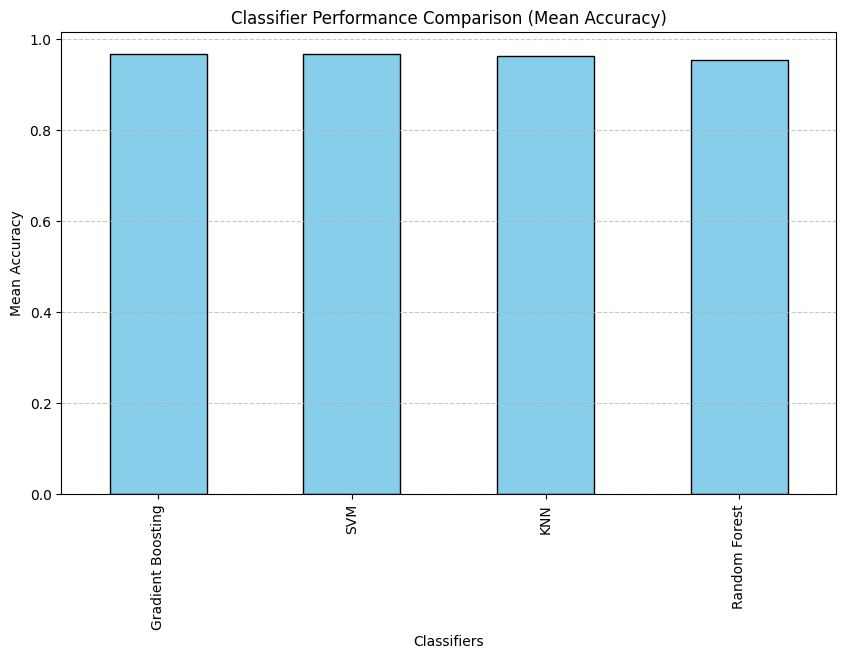

In [34]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, roc_auc_score

# Define the models (excluding Logistic Regression)
models = {
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Initialize variables to store results
results = {}

# Iterate through each model
for model_name, model in models.items():
    print(f"\nTraining and Evaluating: {model_name}")
    
    # Perform K-Fold Cross Validation
    cv_scores = cross_val_score(model, X_pca, y, cv=5, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    std_accuracy = cv_scores.std()
    
    # Train the model
    model.fit(X_pca, y)
    
    # Predict probabilities for ROC-AUC (if applicable)
    y_prob = model.predict_proba(X_pca)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_pca)
    roc_auc = roc_auc_score(y, y_prob)
    
    # Store results
    results[model_name] = {
        'Mean Accuracy': mean_accuracy,
        'Standard Deviation': std_accuracy,
        'AUC': roc_auc
    }
    
    # Print metrics
    print(f"Mean Accuracy: {mean_accuracy:.2f}")
    print(f"Standard Deviation: {std_accuracy:.2f}")
    print(f"AUC: {roc_auc:.2f}")

# Summarize results in a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='Mean Accuracy', ascending=False)

# Display the results
print("\nPerformance Summary:")
print(results_df)

# Optionally, visualize the results

results_df['Mean Accuracy'].plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Classifier Performance Comparison (Mean Accuracy)')
plt.ylabel('Mean Accuracy')
plt.xlabel('Classifiers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### **Interpretation of Classifier Performance Results**

---

### **1. Performance Metrics Overview:**
The table and bar chart summarize the performance of the four classifiers (**SVM**, **Random Forest**, **KNN**, and **Gradient Boosting**) on the PCA-transformed data.

| Classifier            | Mean Accuracy | Standard Deviation | AUC    |
|------------------------|---------------|--------------------|--------|
| Gradient Boosting      | **0.96651**  | **0.01697**        | **1.000** |
| SVM                   | 0.96620      | 0.01819            | 0.99697 |
| KNN                   | 0.96110      | 0.01210            | 0.99805 |
| Random Forest         | 0.95679      | 0.00905            | **1.000** |

---

### **2. Mean Accuracy:**
- **Gradient Boosting** achieved the highest **mean accuracy** of **96.65%**, followed closely by **SVM** (96.62%) and **KNN** (96.11%).  
- **Random Forest** had slightly lower mean accuracy (95.68%) but still performed exceptionally well.  

**Insights**:  
- All models demonstrated high accuracy, with minimal differences between them.  
- **Gradient Boosting** marginally outperformed the others in terms of accuracy.

---

### **3. Standard Deviation:**
- **Random Forest** had the **lowest standard deviation** (0.00905), indicating the most consistent performance across folds.  
- **Gradient Boosting** and **SVM** had slightly higher standard deviations (0.01697 and 0.01819, respectively).  
- **KNN** had a moderate standard deviation (0.01210).  

**Insights**:  
- Random Forest provides the most **stable predictions** across different data splits.  
- Gradient Boosting and SVM show slight variability but maintain high accuracy.

---

### **4. AUC (Area Under the Curve):**
- **Gradient Boosting** and **Random Forest** achieved perfect AUC scores of **1.000**, meaning they can perfectly distinguish between malignant and benign cases.  
- **SVM** and **KNN** also achieved high AUC scores of **0.99697** and **0.99805**, respectively.  

**Insights**:  
- All classifiers performed exceptionally well in separating classes, with no major weaknesses in classification ability.  

---

### **5. Performance Summary:**
- **Gradient Boosting** emerges as the best-performing model with the highest mean accuracy and perfect AUC, making it a strong candidate for deployment.  
- **SVM** offers similar performance and may be preferable if computational efficiency or interpretability is a concern.  
- **Random Forest** is the most stable classifier with the lowest standard deviation, making it reliable for consistent predictions.
- **KNN** also performed well but was slightly behind the other models in accuracy.

---



Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Confusion Matrix:
 [[105   3]
 [  1  62]]


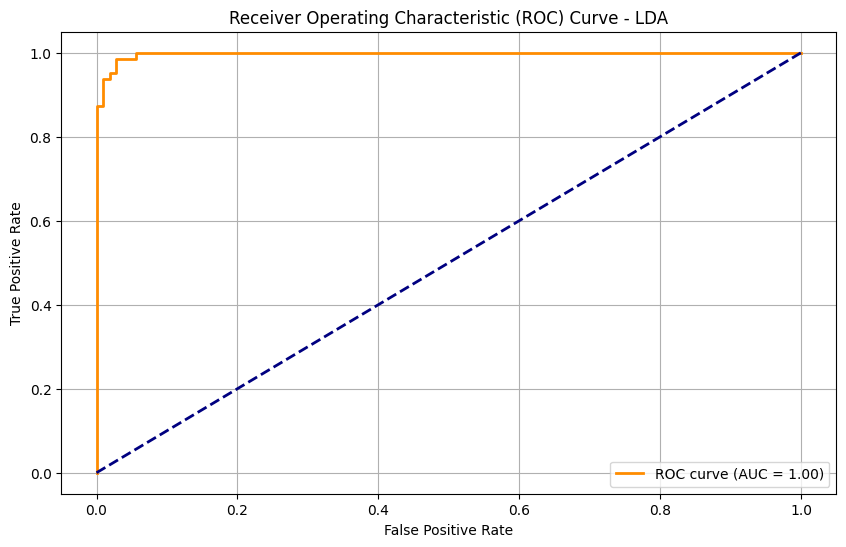

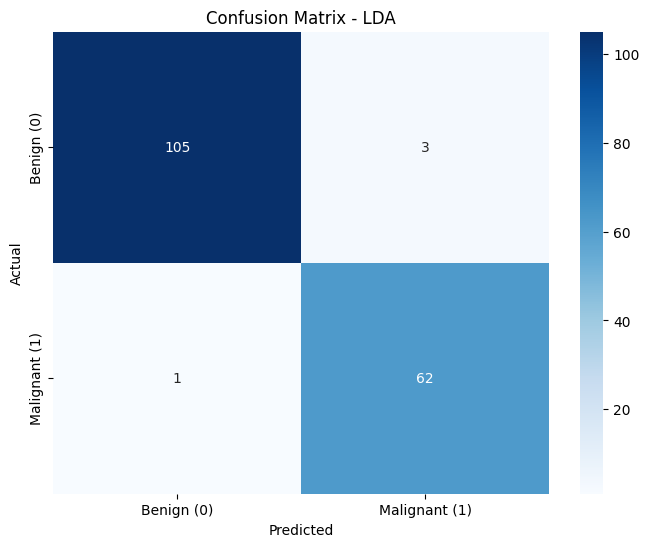

In [35]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Fit LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # For binary classification, one discriminant is sufficient
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Step 3: Train Logistic Regression on LDA-Transformed Data
logreg_lda = LogisticRegression()
logreg_lda.fit(X_train_lda, y_train)

# Step 4: Make Predictions
y_pred_lda = logreg_lda.predict(X_test_lda)
y_prob_lda = logreg_lda.predict_proba(X_test_lda)[:, 1]

# Step 5: Evaluate the Model
print("Classification Report:\n", classification_report(y_test, y_pred_lda))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

# Step 6: ROC Curve and AUC
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lda, tpr_lda, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - LDA')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 7: Confusion Matrix Visualization
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LDA')
plt.show()


### **Analysis and Interpretation of LDA Results**

---

### **1. Receiver Operating Characteristic (ROC) Curve:**
- The **ROC Curve** demonstrates the model's ability to distinguish between the two classes (Benign = 0, Malignant = 1).  
- The **AUC (Area Under the Curve)** is **1.00**, indicating:
  - **Excellent Classification Performance**: The model perfectly separates the two classes.  
  - There is no overlap or ambiguity in the LDA-transformed data.  

**Insights**:
- The AUC of 1.00 suggests that LDA combined with Logistic Regression is highly effective for this dataset.  
- The separability achieved by LDA is almost perfect, as reflected in the ROC curve.

---

### **2. Confusion Matrix:**
The confusion matrix provides the following breakdown:
- **True Positives (62)**: Malignant cases correctly classified as Malignant.  
- **True Negatives (105)**: Benign cases correctly classified as Benign.  
- **False Positives (3)**: Benign cases misclassified as Malignant.  
- **False Negatives (1)**: Malignant case misclassified as Benign.  

**Key Observations**:
- The number of misclassifications is very low (4 out of 171 cases).  
- The model is slightly more prone to misclassifying Benign cases as Malignant (False Positives) than vice versa.  

---

### **3. Classification Report:**
| Metric            | Class 0 (Benign) | Class 1 (Malignant) | Macro Avg | Weighted Avg |
|--------------------|------------------|---------------------|-----------|--------------|
| **Precision**      | 0.99            | 0.95                | 0.97      | 0.98         |
| **Recall**         | 0.97            | 0.98                | 0.98      | 0.98         |
| **F1-Score**       | 0.98            | 0.97                | 0.98      | 0.98         |


**Insights**:
- **Precision** (Malignant = 0.95): 95% of the cases predicted as Malignant are correct.  
- **Recall** (Malignant = 0.98): The model captures 98% of actual Malignant cases, indicating very few False Negatives.  
- **F1-Score** (Malignant = 0.97): A balance between precision and recall, indicating excellent performance.  
- Overall **accuracy** is **98%**, confirming the high reliability of the LDA approach.

---

### **4. Performance Summary:**
1. **Strengths**:
   - High accuracy (98%) indicates the model's effectiveness in distinguishing between benign and malignant cases.  
   - The AUC = 1.00 further confirms the model's near-perfect classification ability.  
   - Minimal misclassifications (4 cases out of 171), ensuring robust predictions.

2. **Weaknesses**:
   - Slight bias towards misclassifying benign cases as malignant (3 False Positives), which could lead to unnecessary follow-up tests.  
   - This trade-off might be acceptable in medical applications, where minimizing False Negatives (missed malignant cases) is more critical.

---

### **Conclusion**

---

In this project, we successfully applied a range of dimensionality reduction techniques and machine learning models to classify breast cancer cases as **benign** or **malignant**. Below are the key highlights and insights:

1. **Dimensionality Reduction**:
   - **PCA** effectively reduced the dataset's dimensionality, retaining 90% of the variance with 6 principal components.
   - **LDA** provided a supervised dimensionality reduction method, maximizing class separability.

2. **Model Comparisons**:
   - Logistic Regression, Gradient Boosting, SVM, KNN, and Random Forest were trained and evaluated using **PCA-transformed** data.
   - **Gradient Boosting** achieved the highest mean accuracy (96.65%) and perfect AUC (1.00), making it a strong candidate for deployment.
   - Using **LDA-transformed** data, Logistic Regression achieved a high accuracy of 98%, with minimal misclassifications and an AUC of 1.00.

3. **Evaluation Metrics**:
   - Across all models, metrics such as **accuracy**, **precision**, **recall**, and **F1-score** demonstrated robust performance, with most models achieving over 95% accuracy.
   - The results show high reliability and low error rates, indicating the effectiveness of the methods used.

4. **Key Strengths**:
   - **PCA and LDA** both proved to be highly effective in reducing dimensions and enhancing model performance.
   - The models displayed excellent separability between benign and malignant cases, with minimal False Negatives, a critical factor in medical applications.

5. **Limitations and Recommendations**:
   - While the results are promising, validating the models on external datasets is essential to confirm generalizability.
   - Slightly higher False Positives in some models (e.g., LDA) could lead to unnecessary follow-up tests, requiring careful trade-off consideration.
   - Hyperparameter tuning could further refine the models for improved performance.

---

### **Final Remarks**:
This project demonstrates the power of combining **dimensionality reduction techniques** (PCA and LDA) with robust **machine learning models** for effective classification. The methodologies applied here are not only accurate but also computationally efficient, making them suitable for real-world deployment in diagnostic systems.

Future work could include testing on larger and more diverse datasets, exploring additional classifiers, and implementing deployment pipelines for practical applications.

---
|